In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [40]:
df = pd.read_json('data.json')
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

In [41]:
pipeline_lr = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression())
])

pipeline_rf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier())
])

In [43]:
pipeline_lr.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])

In [44]:
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier())])

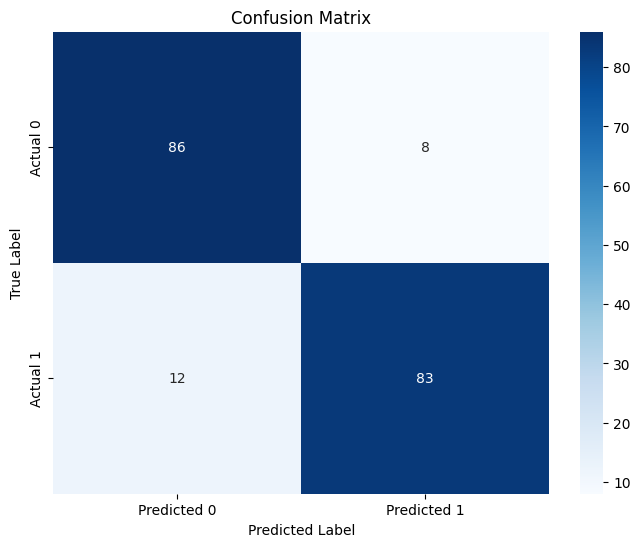

In [60]:
y_pred = pipeline_rf.predict(X_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

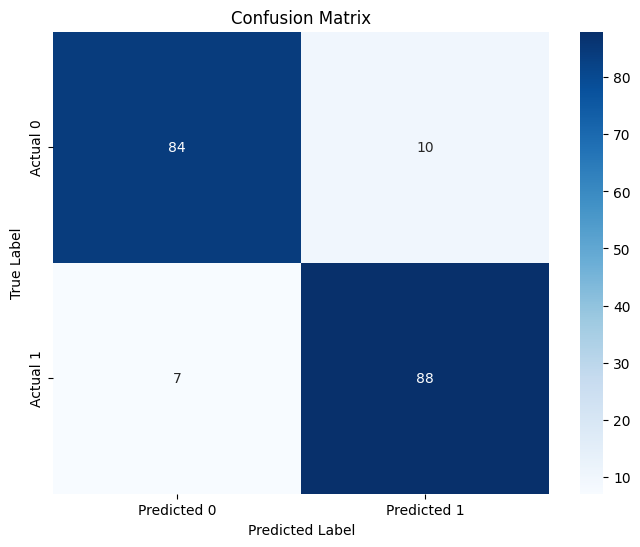

In [61]:
y_pred = pipeline_lr.predict(X_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [45]:
lr_probs = pipeline_lr.predict_proba(X_test)[:, 1]
rf_probs = pipeline_rf.predict_proba(X_test)[:, 1]

In [46]:
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
lr_auc = auc(lr_fpr, lr_tpr)

In [47]:
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = auc(rf_fpr, rf_tpr)

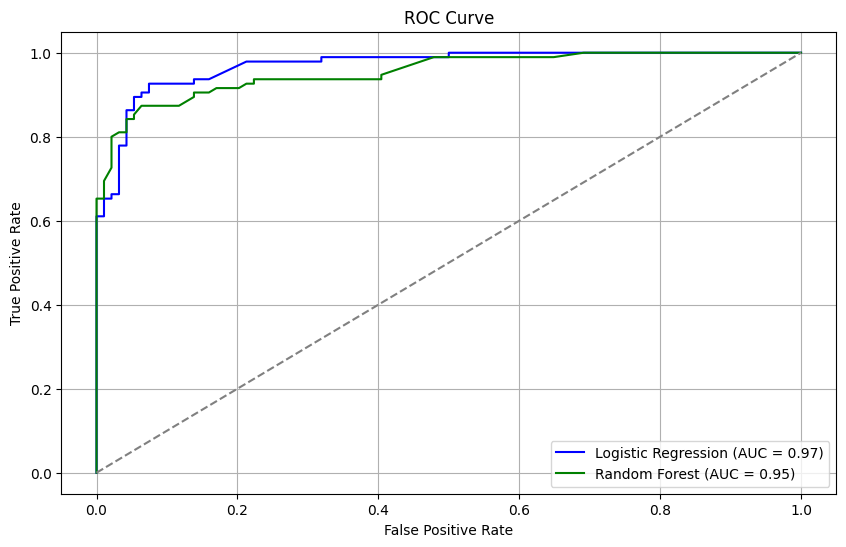

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})', color='blue')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

In [52]:
import ipywidgets as widgets
from IPython.display import display

def classify_text(text):
    prediction = pipeline_rf.predict([text])[0]
    return prediction
    
# Create an input field for the user to input text
text_input = widgets.Text(
    value='',
    placeholder='Enter text here...',
    description='Text:',
    disabled=False
)

# Create an output widget to display the classification result
output = widgets.Output()

# Create a button for classification
classify_button = widgets.Button(
    description='Classify',
    disabled=False,
    button_style='info',  # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click to classify text',
    icon='check'  # (FontAwesome names without the `fa-` prefix)
)

# Define function to handle button click
def on_classify_button_click(b):
    with output:
        output.clear_output()
        result = classify_text(text_input.value)
        print(f"Classification result: {result}")

# Attach function to button click event
classify_button.on_click(on_classify_button_click)

# Display input field, button, and output widget
display(text_input)
display(classify_button)
display(output)

Text(value='', description='Text:', placeholder='Enter text here...')

Button(button_style='info', description='Classify', icon='check', style=ButtonStyle(), tooltip='Click to class…

Output()